In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
RELEASE_FAMILIES_FILENAME = 'release_families.json'

In [3]:
with open(RELEASE_FAMILIES_FILENAME) as f:
    release_family_data = json.load(f)

In [11]:
unique_update_desc = set()
unique_update_freqs = {}

total_num_updates = 0

for release_family in release_family_data:
    for update in release_family['updates']:
        update_name = update['update_name']
        update_desc = update['update_desc']

        if update_desc not in unique_update_desc:
            # unique update
            if update_name in unique_update_freqs:
                unique_update_freqs[update_name] += 1
            else:
                unique_update_freqs[update_name] = 1

            unique_update_desc.add(update_desc)

        total_num_updates += 1
unique_update_freqs

{'Alternative Routes While Driving': 1,
 'Apple Podcasts': 1,
 'Automatic 911 Calls': 1,
 'Automatic Blind Spot Camera': 1,
 'Autopilot Suspension': 1,
 'Cabin Camera': 14,
 'Castle Doombad Game': 1,
 'Custom Lock Sounds': 1,
 'Destination Charging Availability': 1,
 'Detailed Energy Usage': 1,
 'Driving Visualization Improvements': 8,
 'Extras': 14,
 'Fold Mirrors at a Location': 1,
 'FSD Beta v11.4.9': 1,
 'FSD Beta v12.1': 1,
 'FSD Beta v12.1.1': 1,
 'FSD Beta v12.1.2': 1,
 'Full Self-Driving (Beta)': 12,
 'Light Show': 2,
 'Live Camera Access': 1,
 'Minor Fixes': 31,
 'Minor Updates': 1,
 'More Cameras in Live Camera View': 1,
 'Over-the-Air (OTA) Recall': 2,
 'Park Assist Upgrade': 1,
 'Play Games on Rear Screen': 1,
 'Rear Passenger Headphones': 2,
 'Single Pull to Start Autopilot': 3,
 'Speed Assist': 7,
 'Speed Cameras on Your Route': 1,
 'Steering Improvements': 1,
 'Tesla Arcade Updates': 1,
 'Trip Planner on Mobile App': 1,
 'Zoom Video Meetings': 1,
 'Adaptive High Beams': 

In [12]:
print('Total Number of Updates: ', total_num_updates)
print('Total Number of Unique Updates: ', len(unique_update_desc))
print('Number of unique update names: ', len(unique_update_freqs))

Total Number of Updates:  996
Total Number of Unique Updates:  818
Number of unique update names:  462


In [6]:
with open('unique_update_freqs.json', 'w') as f:
    f.write(json.dumps(unique_update_freqs))

In [7]:
unique_update_freqs_df = pd.DataFrame(list(unique_update_freqs.items()), columns=['Update Names', 'Occurrence'])
unique_update_freqs_df

,Update Names,Occurrence
0,Alternative Routes While Driving,1
1,Apple Podcasts,1
2,Automatic 911 Calls,1
3,Automatic Blind Spot Camera,1
4,Autopilot Suspension,1
...,...,...
457,Version 9.0,3
458,Viewing Applications with Media Player Open,1
459,Media,1
460,Traffic View,1


In [8]:
unique_update_freqs_tagged_df = pd.read_csv('unique_update_freqs_tagged.csv')
unique_update_freqs_tagged_df = unique_update_freqs_tagged_df.drop('Occurrence', axis=1)
unique_update_freqs_tagged_df

,Update Names,Type
0,Autopilot,Self Driving
1,Autosteer (Beta),Self Driving
2,Autopark,Self Driving
3,Autosteer Stop Sign Warning,Self Driving
4,Autopilot Suspension,Self Driving
...,...,...
457,Cold Weather,NaN
458,Extras,NaN
459,Navigate on Autopilot (Beta),NaN
460,Cabin Camera,NaN


In [9]:
unique_update_freqs_tagged_df = pd.merge(unique_update_freqs_df, unique_update_freqs_tagged_df, on='Update Names')
unique_update_freqs_tagged_df

,Update Names,Occurrence,Type
0,Alternative Routes While Driving,1,Map Software
1,Apple Podcasts,1,Entertainment
2,Automatic 911 Calls,1,Safety Feature
3,Automatic Blind Spot Camera,1,Self Driving
4,Autopilot Suspension,1,Self Driving
...,...,...,...
457,Version 9.0,3,NaN
458,Viewing Applications with Media Player Open,1,NaN
459,Media,1,Entertainment
460,Traffic View,1,NaN


In [10]:
unique_update_freqs_tagged_df.to_csv('unique_update_freqs.csv', index=False)

In [15]:
unique_update_freqs_tagged_df = pd.read_csv('unique_update_freqs_tagged.csv')

type_counts = {}
for _, row in unique_update_freqs_tagged_df.iterrows():
    update_type = row['Type']

    if update_type == 'Language Support' or \
        update_type == 'Entertainment' or \
            update_type == 'Comfort':
            update_type = 'Not Affecting'

    if update_type in type_counts:
        type_counts[update_type] += row['Occurrence']
    else:
        type_counts[update_type] = row['Occurrence']
    
type_counts

{'User Information': 13,
 'Unknown Safety': 2,
 'Unknown': 2,
 'Self Driving': 137,
 'Safety Feature': 19,
 'Safety Alerts': 1,
 'Recall – Safety': 5,
 'Other': 1,
 'Non-Driving Feature': 29,
 'Minor Fix': 64,
 'Minor Effects to Safety': 74,
 'Map Software': 27,
 'Map Data': 3,
 'Major Effects to Safety': 52,
 'Not Affecting': 199,
 'Fuel and Battery': 40,
 'Diagnostics': 7,
 nan: 143}

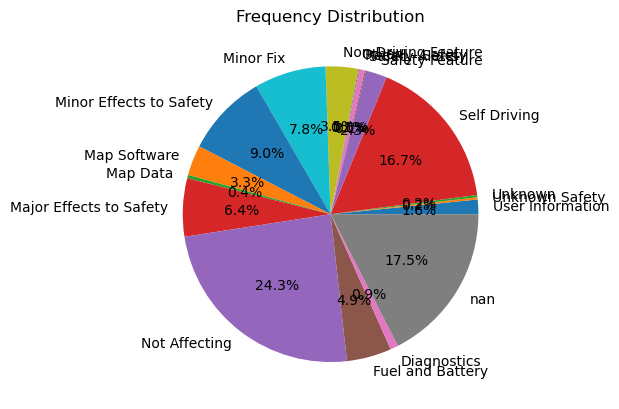

In [16]:
# Extract labels and values from the dictionary
labels = type_counts.keys()
values = type_counts.values()

# Create the pie chart
plt.pie(values, labels=labels, autopct="%1.1f%%")

# Add a title
plt.title("Frequency Distribution")

# Display the chart
plt.show()